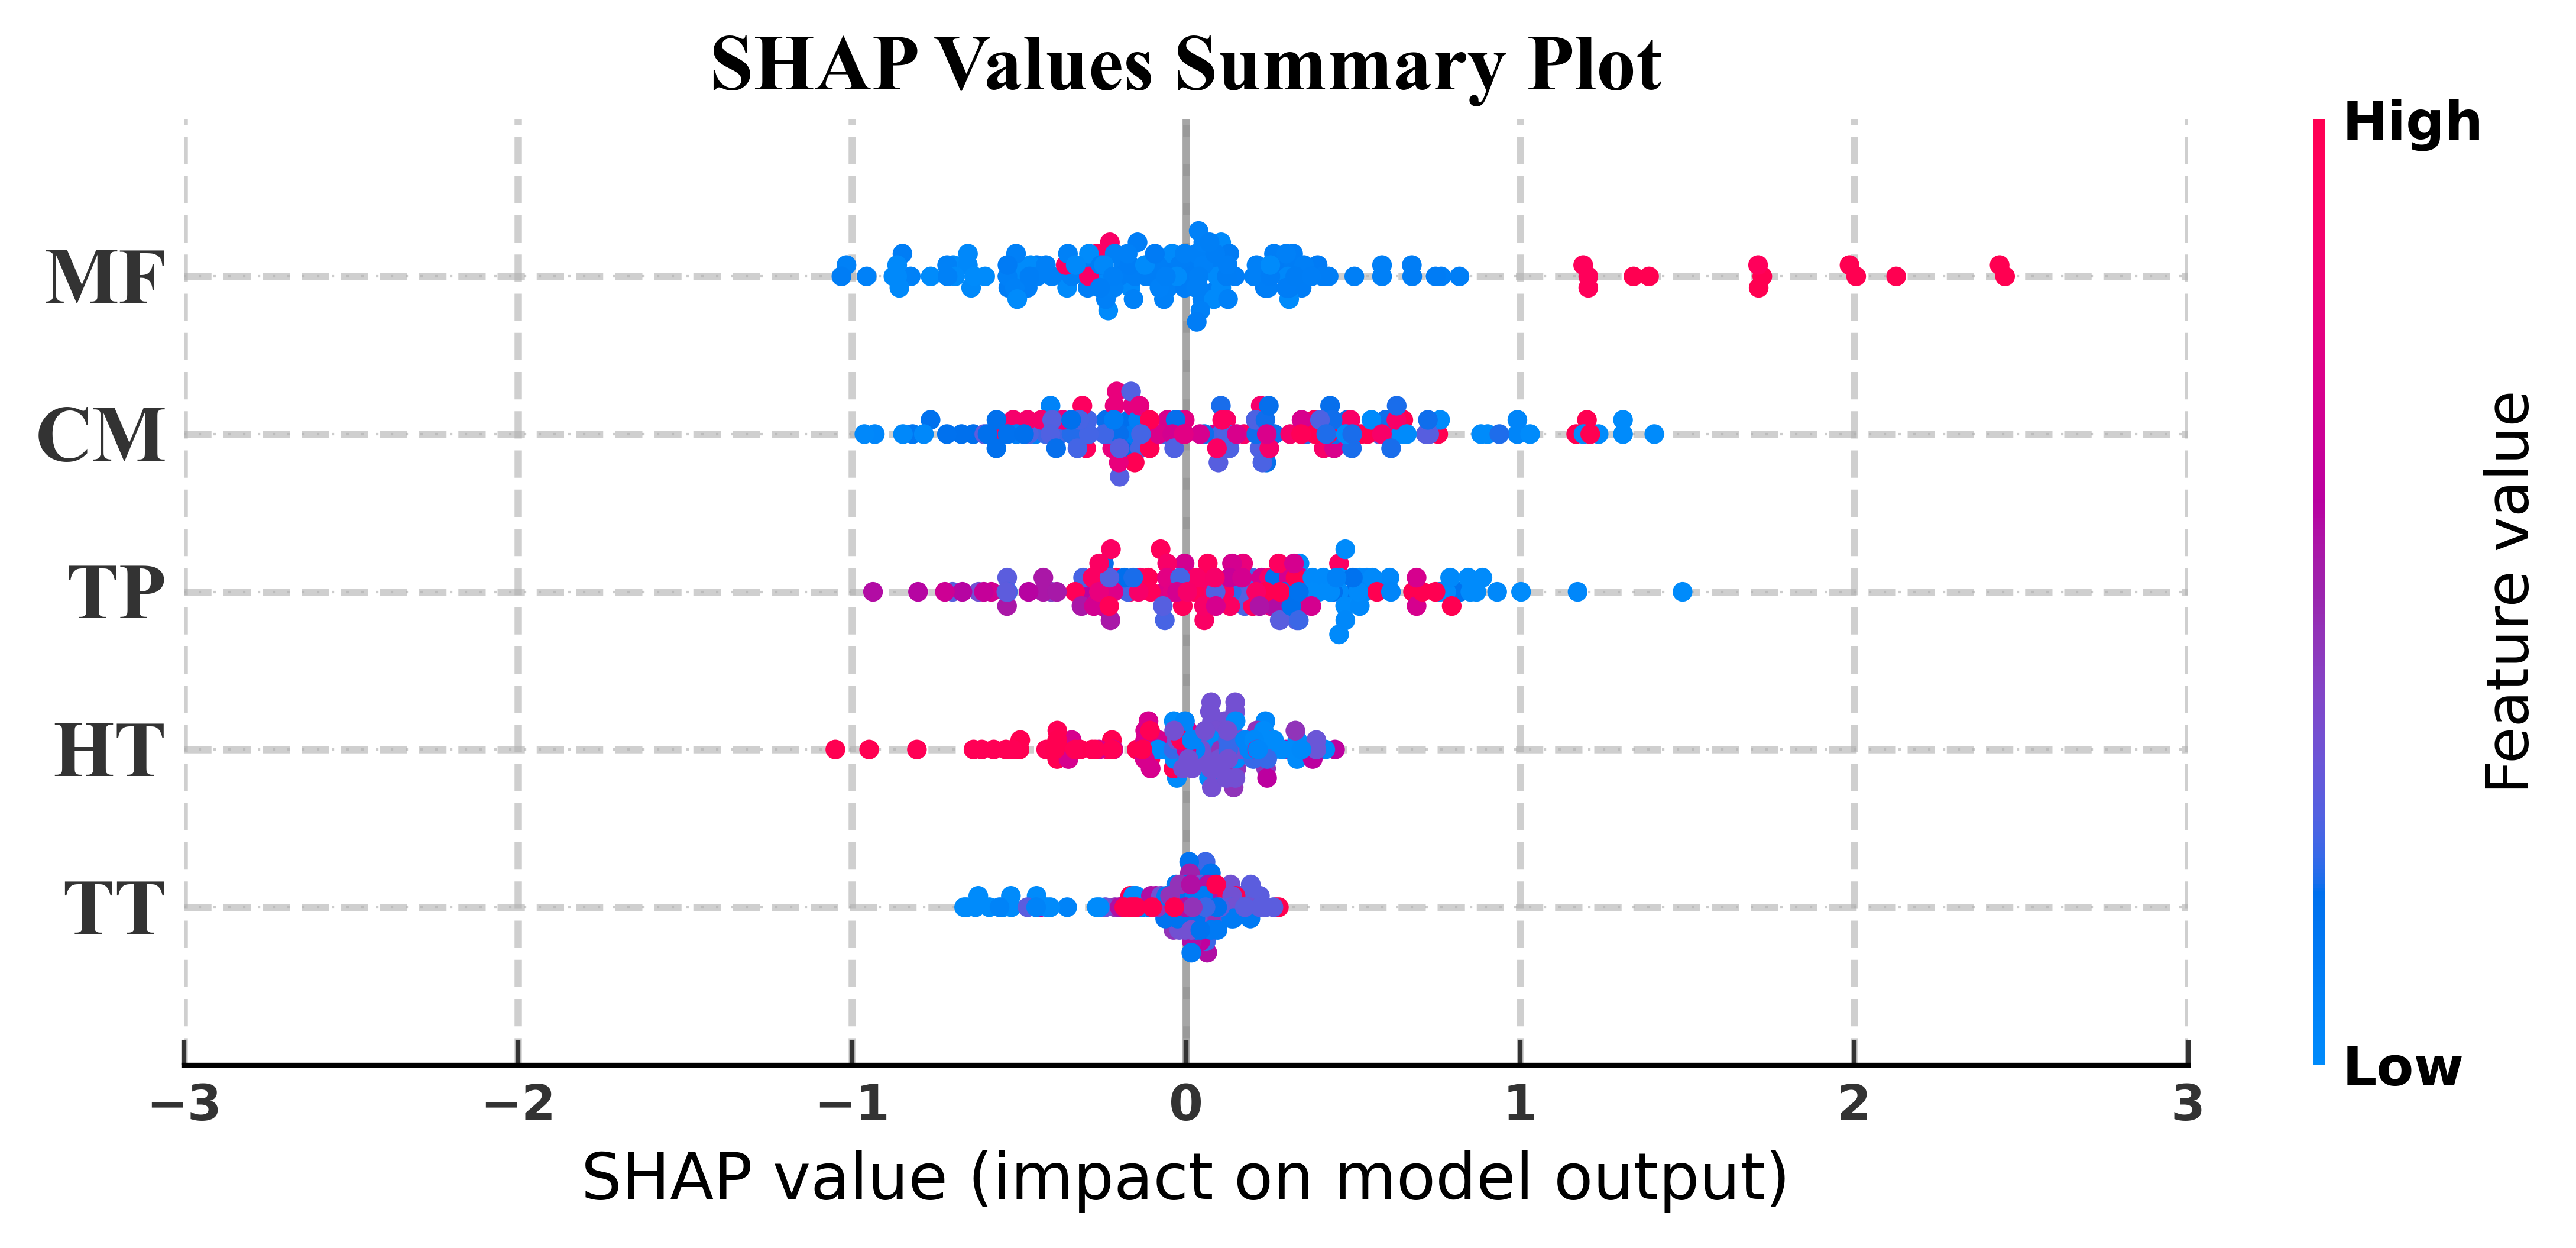

In [4]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create a summary plot for the SHAP values
shap.summary_plot(shap_values, X_val,
                  feature_names=feature_names_list,
                  show=False, plot_type='dot', max_display=5)

# Set plot properties for the summary plot
plt.title('SHAP Values Summary Plot', fontsize=16, fontweight='bold', fontname='Times New Roman')

# Set y-axis labels without bold
ax = plt.gca()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16,fontweight='bold',fontname='Times New Roman')
plt.xticks(np.arange(-3, 4, step=1), fontsize=10, fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.tick_params(axis='both', direction='in', length=5, width=1)
plt.rcParams["font.weight"] = "bold"
plt.grid(True, linestyle='--', alpha=0.6, linewidth=1.5)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('优化后数据.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  

# Scale features and log-transform the label
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()   

# Convert feature_names to a list
feature_names_list = list(feature_names)

# Identify the index of the 'T' feature  
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature  
T_multiplier = 2
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the weighted validation set
shap_values_weighted = explainer.shap_values(X_val_weighted)

# Modify feature names  
feature_names_list_modified = []
for feature in feature_names_list:
    if feature == 'Δεt':
        feature_names_list_modified.append(r'$\Delta\epsilon_{t}$')
    elif feature == 'Δεe':  
        feature_names_list_modified.append(r'$\Delta\epsilon_{e}$')
    elif feature == 'Δεp':
        feature_names_list_modified.append(r'$\Delta\epsilon_{p}$')
    else:
        feature_names_list_modified.append(feature)

# Create a bar plot of average absolute SHAP values
plt.rcParams['figure.dpi'] = 600
shap.summary_plot(shap_values_weighted, X_val_weighted, 
                  feature_names=feature_names_list_modified,
                  plot_type="bar", max_display=10,
                  show=False)

# Set plot properties   
plt.title('Average |SHAP Values| Bar Chart', fontsize=16,  
          fontweight='bold', fontname='Times New Roman')   
plt.xticks(rotation=0, ha="right", fontsize=10, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.tick_params(axis='both', direction='in', length=5, width=1)
plt.rcParams["font.weight"] = "bold"
plt.show()

# Extract and display feature values of top features
top_features = feature_names_list_modified[:10]
top_feature_indices = [feature_names_list_modified.index(f) for f in top_features]

# Create a DataFrame to display the values
top_features_values = X_val_weighted[:, top_feature_indices]
df_top_features = pd.DataFrame(top_features_values, columns=top_features)

# Display the DataFrame
print("Feature values of top SHAP features in the validation set:")
print(df_top_features.head())